# **Features analysis**

This a study about the average of each feature for each class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2 as cv
import os
import pandas as pd
import string

In [2]:
# separate the data set loaded (npy file) in features and targets

def separate_array(data):    
    image = []
    labels = []
    for line in data:
        image.append(np.array(line[:-1]))
        labels.append(line[-1])
    
    return image, labels

In [3]:
# Load the npy files with the features computed and targets and separate

X_train_class, Y_train_class = separate_array(np.load('./../secondAnalyse/photosFeatures_test.npy'))
X_validation_class, Y_validation_class = separate_array(np.load('./../secondAnalyse/photosFeatures_validation.npy'))
X_test_class, Y_test_class = separate_array(np.load('./../secondAnalyse/photosFeatures_test.npy'))

In [4]:
# Create a dataframe with the features and targets

def join_data(X_data, Y_data):
    new_array = []
    if len(X_data) == len(Y_data):
        for i in range(len(X_data)):
            line = np.asarray(X_data[i]).reshape(-1).tolist()
            line.append(Y_data[i])
            
            new_array.append(line)

    return pd.DataFrame(new_array)

In [5]:
# For a specific class, calculate the average for all features and 
# return a list with the values
#
# Parameters:
# - df_class: dataset's dataframe (features and targets)
# - number: class whose features will be computed
#
# Return:
# - average: list with all mean values  

def average_features(df_class, number):
    
    # create a dataframe with features and target
    df_class_selected = df_class.loc[df_class[12] == number]
    
    # average for each column (features)
    average = (df_class_selected.mean(axis=0)).tolist()
    
    # remove the last column (target)
    average = average[:len(average)-1]
    
    return average

In [6]:
# For all classes in a data set, calculate the average for all features
#
# Parameters:
# - X_class, Y_class
#
# Return:
# - avg_features_classes: list will all mean values (2 dimensions) 

def average_features_classes(X_class, Y_class):
    
    # join the data set
    df_class = join_data(X_class, Y_class)
    
    avg_features_classes = []
    
    for i in range(1,7):
        avg_features_classes.append(average_features(df_class, i))
    
    return avg_features_classes

In [7]:
def plotBarGraph(x, y, title, ylabel, file_name, dataset_name):    
    
    plt.figure(figsize=(6,6))
    plt.grid()
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel(ylabel)
    plt.savefig('./graphs_features' + '/' + dataset_name + '/' + file_name + '_' + dataset_name)
    
    return 0

In [8]:
def plot_average_features(X_class, Y_class, dataset_name):

    avg = average_features_classes(X_class, Y_class)
    avg_t = ((np.asarray(avg)).T).tolist()

    digits = [i for i in range(1,7)]
    keys = ['var', 'std', 'mean_grad_M', 'std_grad_M', 'mean_grad_D', 'std_grad_D', 'mean_PC_X', 'std_PC_X', 'active_PC_X', 'mean_PC_Y', 'std_PC_Y', 'active_PC_Y']

    for i in range(12):
        plotBarGraph(digits, avg_t[i], keys[i], keys[i], keys[i], dataset_name)
    
    return

In [9]:
#plot_average_features(X_train_class, Y_train_class, "train")

In [10]:
#plot_average_features(X_validation_class, Y_validation_class, "validation")

In [11]:
#plot_average_features(X_test_class, Y_test_class, "test")

In [12]:
#plot_average_features(X_test_photos_class, Y_test_photos_class, "test_photos")

## Another approach ##

Analysis of average of each feature for each class.

In [13]:
def plot_graph(avg_values, title, dataset_name):
    
    keys = ['var', 'std', 'mean_grad_M', 'std_grad_M', 'mean_grad_D', 'std_grad_D', 'mean_PC_X', 'std_PC_X', 'active_PC_X', 'mean_PC_Y', 'std_PC_Y', 'active_PC_Y']
    
    plt.figure(figsize=(24,10))
    plt.grid()
    plt.plot(keys,avg_values)
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.title(title)
    plt.legend("123456")
    plt.savefig('./graphs_features' + '/' + dataset_name)
    plt.show()
    
    return

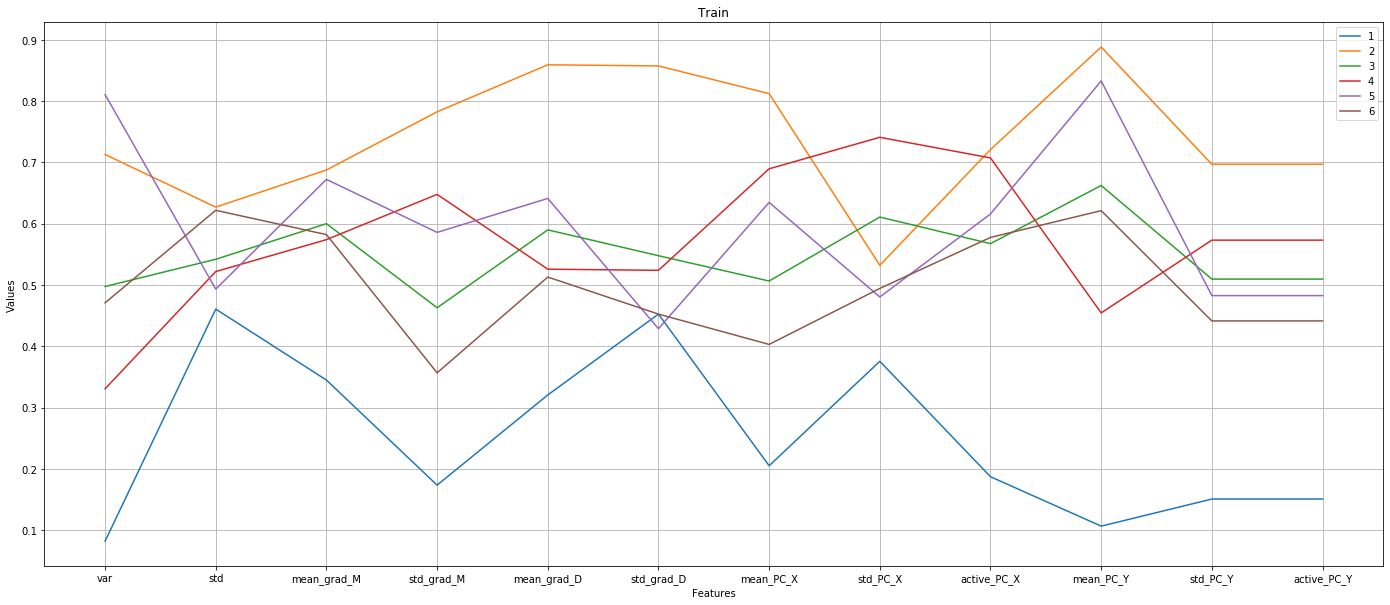

In [14]:
avg_train = average_features_classes(X_train_class, Y_train_class)
avg_train_t = (np.asarray(avg_train).T).tolist()

plot_graph(avg_train_t, "Train", "train")

In [17]:
df = pd.DataFrame(avg_train_t)
df

,0,1,2,3,4,5
0,0.082056,0.712705,0.497425,0.330555,0.810577,0.470770
1,0.460555,0.626858,0.541766,0.521772,0.493101,0.621675
2,0.344810,0.687456,0.599916,0.573807,0.672083,0.582045
3,0.173472,0.782290,0.462736,0.647647,0.585685,0.356622
4,0.320513,0.858974,0.589744,0.525641,0.641026,0.512821
5,0.452381,0.857143,0.547619,0.523810,0.428571,0.452381
6,0.205071,0.811929,0.506338,0.689360,0.634572,0.402949
7,0.375426,0.531988,0.610691,0.740717,0.480280,0.494265
8,0.187192,0.720663,0.567276,0.707117,0.615759,0.577441
9,0.106580,0.887993,0.662128,0.454350,0.832650,0.621122


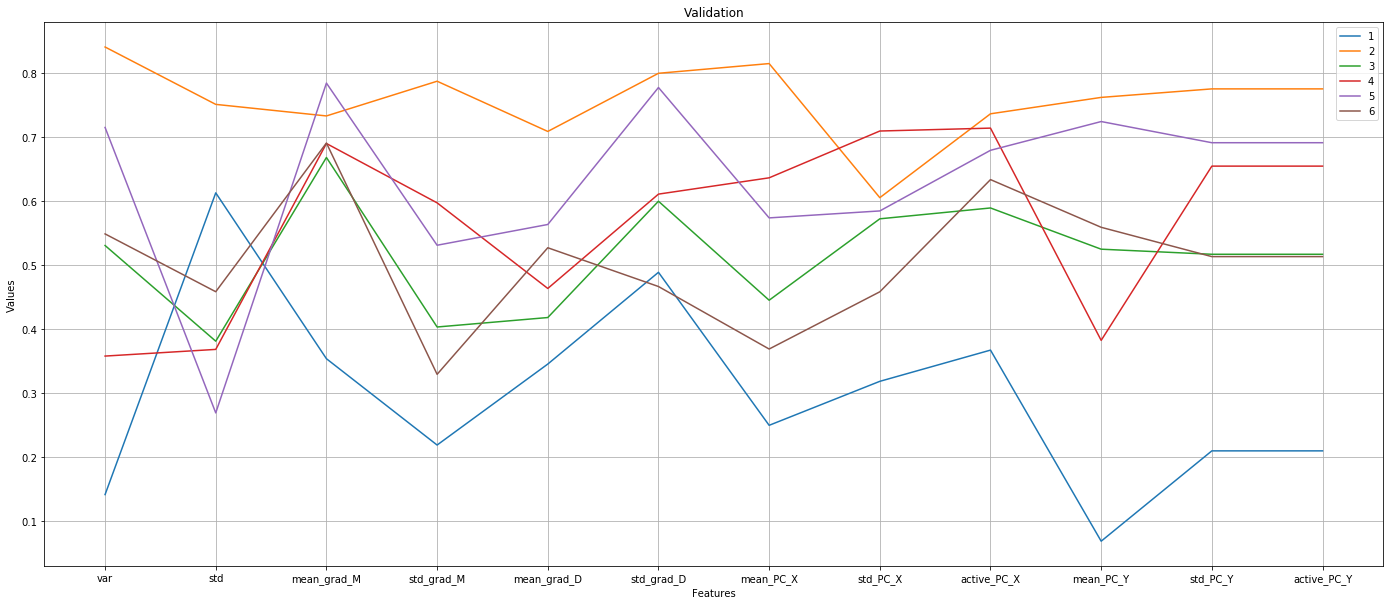

In [19]:
avg_validation = average_features_classes(X_validation_class, Y_validation_class)
avg_validation_t = (np.asarray(avg_validation).T).tolist()

plot_graph(avg_validation_t, "Validation", "validation")

In [20]:
df = pd.DataFrame(avg_validation_t)
df

,0,1,2,3,4,5
0,0.141421,0.841087,0.530788,0.357933,0.715337,0.548907
1,0.613069,0.751385,0.381212,0.368369,0.269106,0.458543
2,0.353815,0.733328,0.668375,0.690239,0.784692,0.690996
3,0.218862,0.787601,0.403394,0.597462,0.531195,0.329407
4,0.345455,0.709091,0.418182,0.463636,0.563636,0.527273
5,0.488889,0.800000,0.600000,0.611111,0.777778,0.466667
6,0.249687,0.815178,0.445232,0.636591,0.573944,0.368945
7,0.318451,0.605561,0.572503,0.709748,0.584822,0.458411
8,0.367262,0.736672,0.589465,0.714278,0.679590,0.633814
9,0.068561,0.762303,0.525019,0.382492,0.724566,0.559247


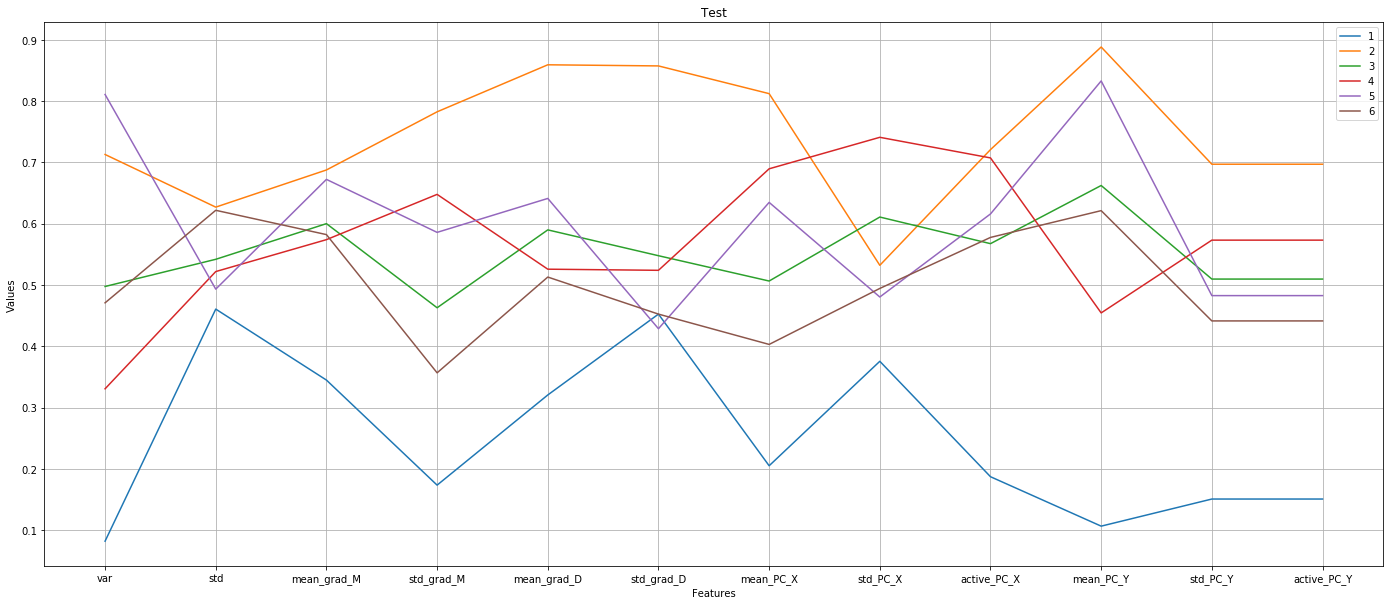

In [22]:
avg_test = average_features_classes(X_test_class, Y_test_class)
avg_test_t = (np.asarray(avg_test).T).tolist()

plot_graph(avg_test_t, "Test", "test")

In [24]:
df = pd.DataFrame(avg_test_t)
df

,0,1,2,3,4,5
0,0.082056,0.712705,0.497425,0.330555,0.810577,0.470770
1,0.460555,0.626858,0.541766,0.521772,0.493101,0.621675
2,0.344810,0.687456,0.599916,0.573807,0.672083,0.582045
3,0.173472,0.782290,0.462736,0.647647,0.585685,0.356622
4,0.320513,0.858974,0.589744,0.525641,0.641026,0.512821
5,0.452381,0.857143,0.547619,0.523810,0.428571,0.452381
6,0.205071,0.811929,0.506338,0.689360,0.634572,0.402949
7,0.375426,0.531988,0.610691,0.740717,0.480280,0.494265
8,0.187192,0.720663,0.567276,0.707117,0.615759,0.577441
9,0.106580,0.887993,0.662128,0.454350,0.832650,0.621122
